<a href="https://colab.research.google.com/github/frhannn1/BCC-Intern/blob/main/kelompok_4_wr_3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bisnis Understanding

Fokus utama adalah memprediksi apakah suatu startup yang sedang beroperasi akan menjadi sukses atau mengalami kegagalan di masa depan. Melalui analisis yang kami lakukan, kami dapat mencari pola atau korelasi antara fitur-fitur tertentu (seperti total pendanaan, lokasi geografis, kategori bisnis) dengan status operasional perusahaan. Hal ini dapat memberikan wawasan tentang faktor-faktor yang berkorelasi dengan kesuksesan atau kegagalan startup.

## Pertanyaan Bisnis
1. Bagaimana hubungan antara  total pendanaan (funding_total_usd) dengan status suatu startup?
2.  Kategori startup(category_list) mana yang memiliki jumlah startup sukses paling banyak?
3. Berapa persentase perusahaan startup yang beroprasi dan yang gagal(closed) dan berapa persen yang sukses?
4. Apakah ada perbedaan signifikan dalam jumlah pendanaan terkait dengan lokasi startup?
5. Bagaimana faktor waktu memengaruhi kesuksesan sebuah startup?
6. Apa saja kategori start up yang sukses di USA?

# Data Understanding

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/frhannn1/BCC-Intern/main/big_startup_secsees_dataset.csv')
data.head(10)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09
8,/organization/1,One Inc.,http://whatis1.com,Mobile,1150050,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,40000,operating,CHL,12,Santiago,Las Condes,1,2012-01-01,2013-02-18,2013-02-18


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


In [ ]:
data.nunique()

permalink            66368
name                 66102
homepage_url         61191
category_list        27296
funding_total_usd    18896
status                   4
country_code           137
state_code             311
region                1092
city                  5111
funding_rounds          19
founded_at            3978
first_funding_at      4817
last_funding_at       4518
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['status'].unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

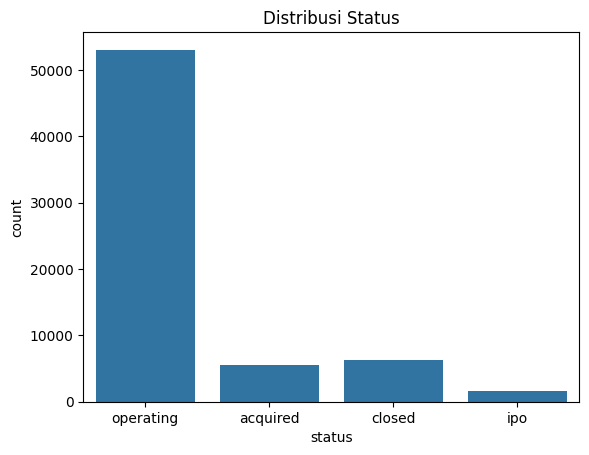

In [ ]:
sns.countplot(x='status', data=data)
plt.title('Distribusi Status')
plt.show()

In [ ]:
data_copy = data.copy()

In [ ]:
count_status_train = data_copy[data_copy['status'].isin(['ipo', 'closed', 'acquired'])].shape[0]
count_status_train

13334

In [ ]:
data_copy[data_copy['status'].isin(['ipo', 'close', 'acquired'])].isna().sum()

permalink               0
name                    0
homepage_url          498
category_list         133
funding_total_usd       0
status                  0
country_code          340
state_code            427
region                401
city                  401
funding_rounds          0
founded_at           1576
first_funding_at        1
last_funding_at         0
dtype: int64

In [ ]:
data_copy[data_copy['status'].isin(['operating'])].shape[0]

53034

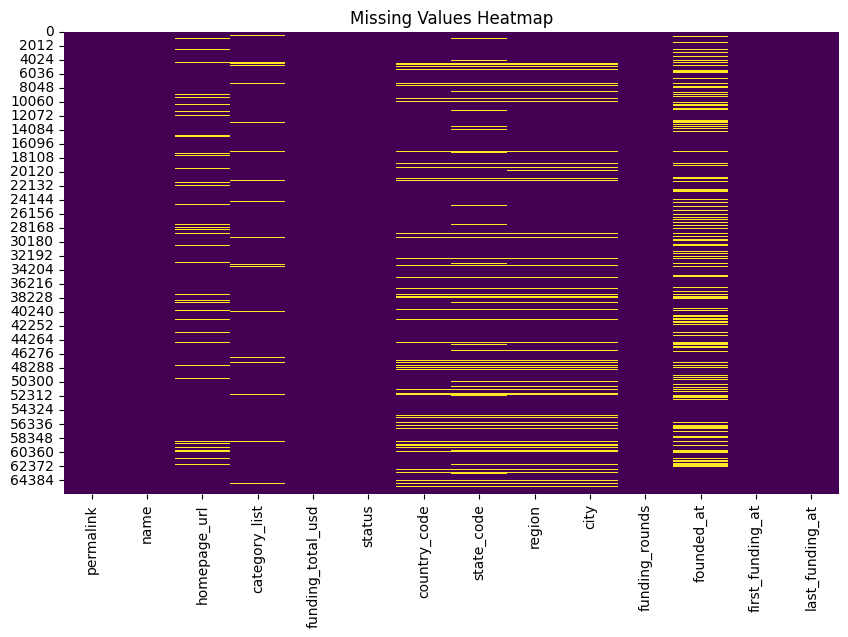

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
data_copy

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01


In [ ]:
data_copy['status'] =  data_copy['status'].replace(['ipo', 'acquired'], 'success')


In [ ]:
data_copy['status'].unique()

array(['operating', 'success', 'closed'], dtype=object)

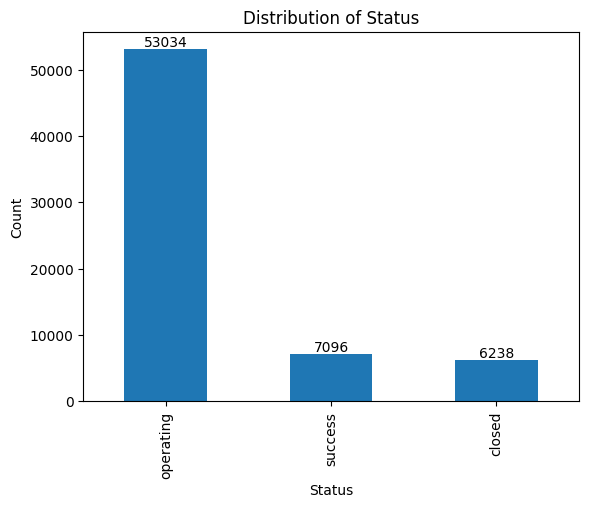

In [ ]:
distribution_success = data_copy['status'].value_counts()
ax = distribution_success.plot(kind='bar')
ax.set_title('Distribution of Status')
ax.set_xlabel('Status')
ax.set_ylabel('Count')

# Menambahkan label jumlah pada setiap batang
for i, v in enumerate(distribution_success):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()


# Explorasi Data Analys (EDA)

## Hubungan total_fund dengan status starup

In [ ]:
data_totfund_status = data[['funding_total_usd','status']]
data_totfund_status

,funding_total_usd,status
0,10000000,operating
1,700000,operating
2,3406878,operating
3,2000000,operating
4,-,operating
...,...,...
66363,1587301,operating
66364,114304,operating
66365,-,operating
66366,18192,operating


ubah type data dari total fund ke numerik agar dapat dilakukan perhitungan

In [ ]:
data_totfund_status['funding_total_usd'] = pd.to_numeric(data_totfund_status['funding_total_usd'], errors='coerce')
non_numeric_values = data_totfund_status[data_totfund_status['funding_total_usd'].isnull()]['funding_total_usd']
non_numeric_values

<ipython-input-4138-e50c885e25ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_totfund_status['funding_total_usd'] = pd.to_numeric(data_totfund_status['funding_total_usd'], errors='coerce')


4       NaN
10      NaN
11      NaN
12      NaN
22      NaN
         ..
66345   NaN
66346   NaN
66347   NaN
66351   NaN
66365   NaN
Name: funding_total_usd, Length: 12785, dtype: float64

In [ ]:
grouped_by_status = data_totfund_status.groupby('status')['funding_total_usd']
grouped_by_status.describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,4790.00,28293042.52,128003354.87,1500.00,2990956.75,10000000.00,26785659.50,5820000000.00
closed,4912.00,10897944.94,43808886.89,2.00,200000.00,1250000.00,7000000.00,1567504319.00
ipo,1441.00,145705191.96,988293378.89,4000.00,9400000.00,30675796.00,94100000.00,30079503000.00
operating,42440.00,13928451.44,93969505.42,1.00,270803.50,1520832.00,7771325.00,10664943639.00


In [ ]:
grouped_by_status = data_totfund_status.groupby('status')['funding_total_usd']
grouped_by_status.describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,4790.00,28293042.52,128003354.87,1500.00,2990956.75,10000000.00,26785659.50,5820000000.00
closed,4912.00,10897944.94,43808886.89,2.00,200000.00,1250000.00,7000000.00,1567504319.00
ipo,1441.00,145705191.96,988293378.89,4000.00,9400000.00,30675796.00,94100000.00,30079503000.00
operating,42440.00,13928451.44,93969505.42,1.00,270803.50,1520832.00,7771325.00,10664943639.00


<ipython-input-4141-19d39f60bd9c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status', y='funding_total_usd', data=average_funding_by_status, palette=['orange', 'lightcoral','gold' , 'skyblue'])


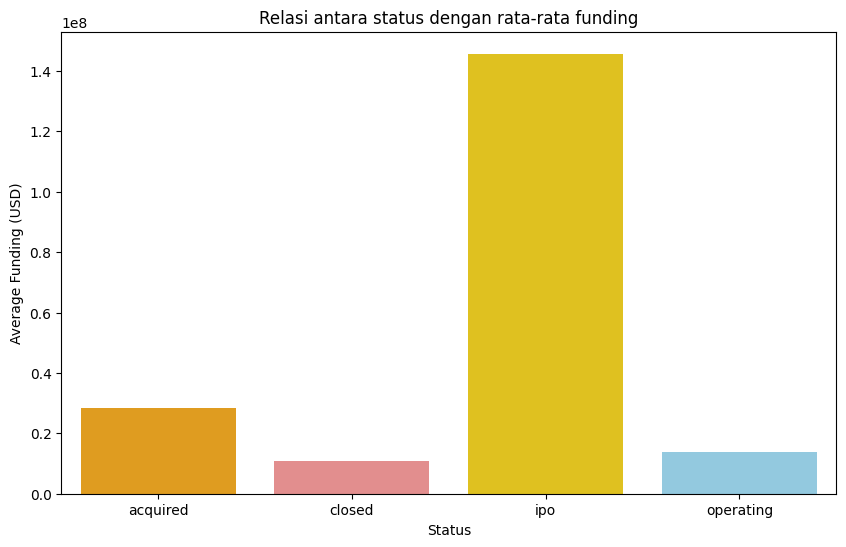

In [ ]:
average_funding_by_status = data_totfund_status.groupby('status')['funding_total_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='funding_total_usd', data=average_funding_by_status, palette=['orange', 'lightcoral','gold' , 'skyblue'])
plt.xlabel('Status')
plt.ylabel('Average Funding (USD)')
plt.title('Relasi antara status dengan rata-rata funding')
plt.show()

In [ ]:
data_fund_success = data_copy[['status','funding_total_usd']]
data_fund_success

,status,funding_total_usd
0,operating,10000000
1,operating,700000
2,operating,3406878
3,operating,2000000
4,operating,-
...,...,...
66363,operating,1587301
66364,operating,114304
66365,operating,-
66366,operating,18192


In [ ]:
data_fund_success['funding_total_usd'] = pd.to_numeric(data_totfund_status['funding_total_usd'], errors='coerce')

<ipython-input-4143-e5dced835bcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fund_success['funding_total_usd'] = pd.to_numeric(data_totfund_status['funding_total_usd'], errors='coerce')


In [ ]:
grouped_by_status_success = data_fund_success.groupby('status')['funding_total_usd']
grouped_by_status_success.describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
closed,4912.00,10897944.94,43808886.89,2.00,200000.00,1250000.00,7000000.00,1567504319.00
operating,42440.00,13928451.44,93969505.42,1.00,270803.50,1520832.00,7771325.00,10664943639.00
success,6231.00,55446133.09,490719715.34,1500.00,3685000.00,12400000.00,35858302.50,30079503000.00


<ipython-input-4145-9aab6059a18a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status', y='funding_total_usd', data=average_fundsuccess_by_status, palette=['lightcoral', 'skyblue','lightgreen'])


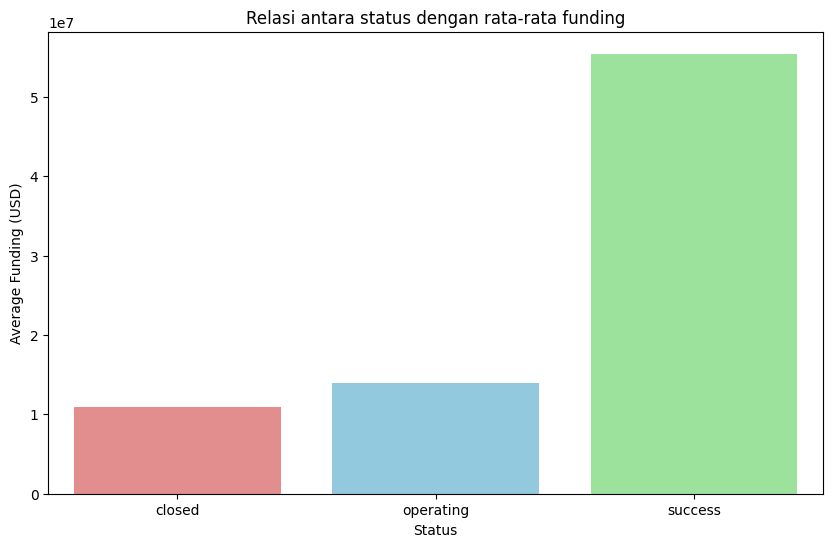

In [ ]:
average_fundsuccess_by_status = data_fund_success.groupby('status')['funding_total_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='funding_total_usd', data=average_fundsuccess_by_status, palette=['lightcoral', 'skyblue','lightgreen'])
plt.xlabel('Status')
plt.ylabel('Average Funding (USD)')
plt.title('Relasi antara status dengan rata-rata funding')
plt.show()

## Kategori startup(category_list) mana yang memiliki jumlah startup sukses paling banyak?

In [ ]:
data['category_list'].nunique()

27296

In [ ]:
data_kategori_totalfund =data[['category_list','funding_total_usd','status']]
data_kategori_totalfund

,category_list,funding_total_usd,status
0,Media,10000000,operating
1,Application Platforms|Real Time|Social Network...,700000,operating
2,Apps|Games|Mobile,3406878,operating
3,Curated Web,2000000,operating
4,Software,-,operating
...,...,...,...
66363,Enterprise Software,1587301,operating
66364,Advertising|Mobile|Web Development|Wireless,114304,operating
66365,NaN,-,operating
66366,Consumer Electronics|Internet of Things|Teleco...,18192,operating


In [ ]:
data_kategori_totalfund['funding_total_usd'] = pd.to_numeric(data_kategori_totalfund['funding_total_usd'], errors='coerce')
grouped_data = data_kategori_totalfund.groupby('category_list').agg({'funding_total_usd': 'mean', 'status': 'unique'}).reset_index()


<ipython-input-4148-082692900ef1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kategori_totalfund['funding_total_usd'] = pd.to_numeric(data_kategori_totalfund['funding_total_usd'], errors='coerce')


In [ ]:
highest_avg_funding_category = grouped_data.sort_values(by='funding_total_usd', ascending=False)
highest_avg_funding_category.head(20)

,category_list,funding_total_usd,status
12123,Communications Infrastructure|Information Tech...,15040894277.00,"[operating, ipo]"
12810,Consulting|Product Development Services|Produc...,10664943639.00,[operating]
24124,Internet|Telecommunications|Television|Video,5162513431.00,[ipo]
5796,Architecture|Banking|Finance,5150000000.00,[ipo]
7237,Banking|Financial Services|Insurance|Investmen...,4745460219.00,[operating]
1209,Advertising|Broadcasting|Content,4715000000.00,[acquired]
17030,Distributors|E-Commerce|Manufacturing,4630000000.00,[ipo]
6604,Automotive|Design|Limousines|Public Transporta...,4109165015.00,[operating]
26108,Payments|Trading,3500000000.00,[ipo]
2288,Agriculture|Animal Feed|Biotechnology,3200000000.00,[operating]


<ipython-input-4150-5c765c5ebfb8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='funding_total_usd', y='category_list', data=top_10_categories, palette='viridis')


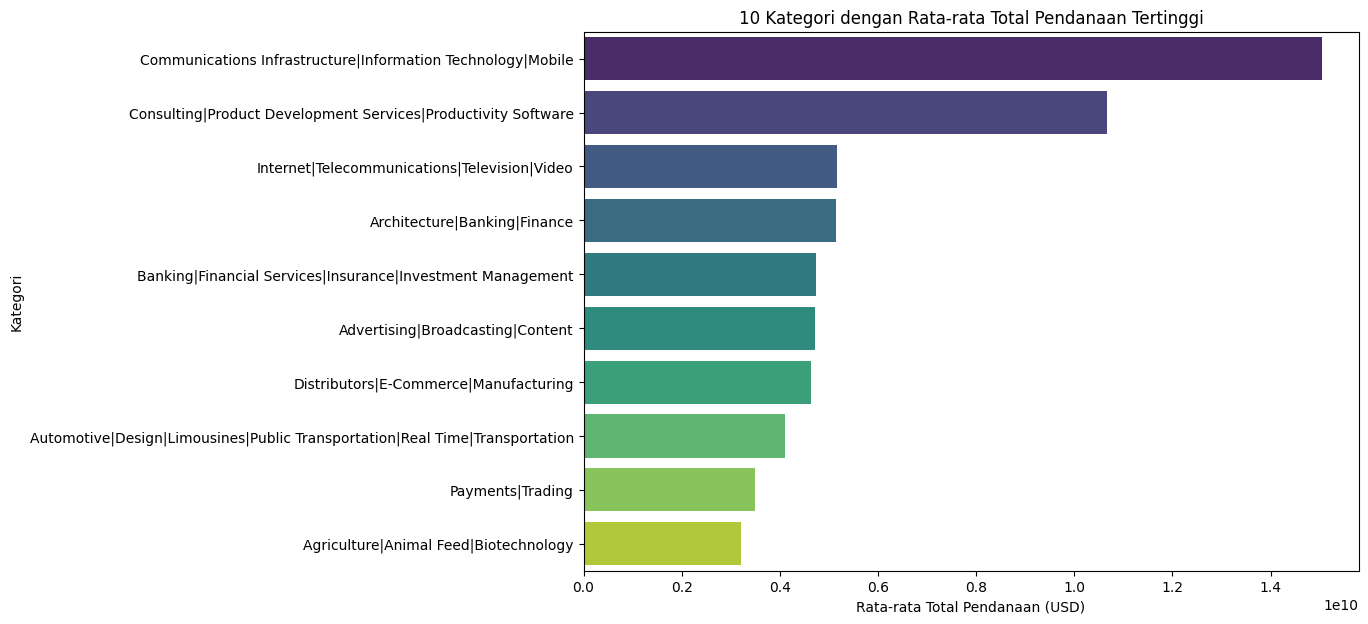

In [ ]:
top_10_categories=highest_avg_funding_category.head(10)
plt.figure(figsize=(10, 7))
sns.barplot(x='funding_total_usd', y='category_list', data=top_10_categories, palette='viridis')
plt.xlabel('Rata-rata Total Pendanaan (USD)')
plt.ylabel('Kategori')
plt.title('10 Kategori dengan Rata-rata Total Pendanaan Tertinggi')
plt.show()

In [ ]:
data_category_succes = data_copy[['category_list','status']]
data_category_succes

,category_list,status
0,Media,operating
1,Application Platforms|Real Time|Social Network...,operating
2,Apps|Games|Mobile,operating
3,Curated Web,operating
4,Software,operating
...,...,...
66363,Enterprise Software,operating
66364,Advertising|Mobile|Web Development|Wireless,operating
66365,NaN,operating
66366,Consumer Electronics|Internet of Things|Teleco...,operating


In [ ]:
data_category_success = data_copy[data_copy['status'] == 'success'][['category_list', 'status']]

<ipython-input-4153-2ad142176528>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category_list', data=data_category_success, order=top_10_categories_success,palette='viridis')


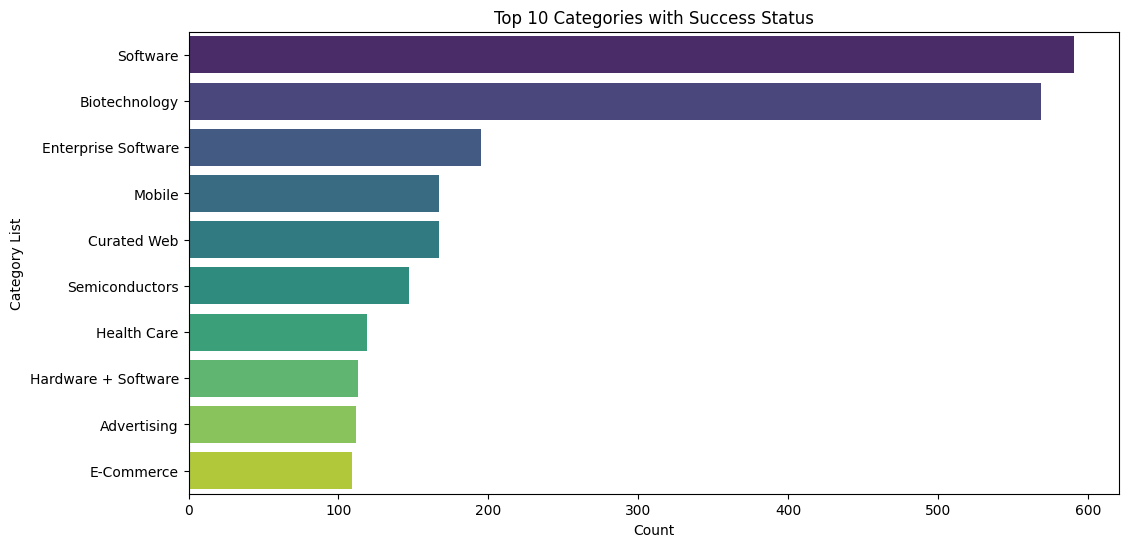

In [ ]:
top_10_categories_success = data_category_success['category_list'].value_counts().nlargest(10).index

# Menggunakan data_category_success yang telah difilter
plt.figure(figsize=(12, 6))
sns.countplot(y='category_list', data=data_category_success, order=top_10_categories_success,palette='viridis')
plt.title('Top 10 Categories with Success Status')
plt.xlabel('Count')
plt.ylabel('Category List')
plt.show()

## Presentase startup yang tutup dengan starup yang sukses(ipo/acquired)

In [ ]:
data_status = data['status']

In [ ]:
data_status.unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [ ]:
status_counts = data['status'].value_counts()

status_percentage = (status_counts / len(data)) * 100


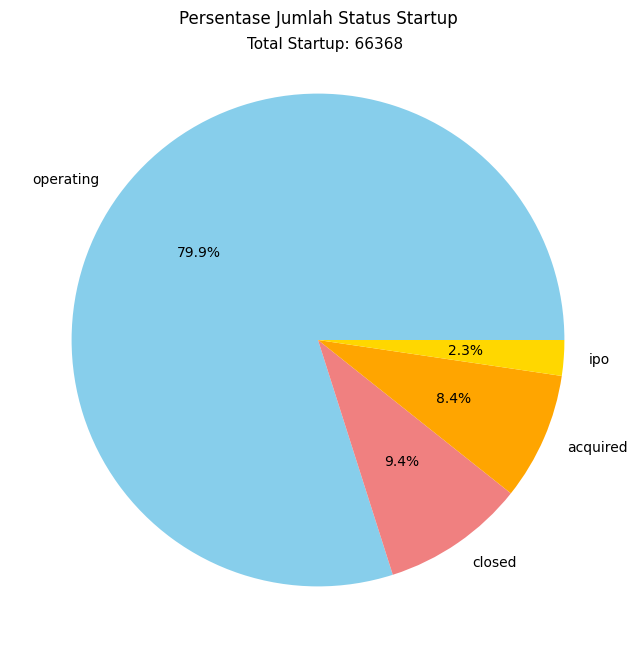

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(status_percentage, labels=status_percentage.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'orange', 'gold'])
plt.title('Persentase Jumlah Status Startup')
plt.text(0.03, 1.2, f"Total Startup: {len(data)}", color='black', ha='center', va='center', fontsize=11)
plt.show()

In [ ]:
status_counts_succes = data_copy['status'].value_counts()

status_percentage_succes = (status_counts_succes / len(data)) * 100

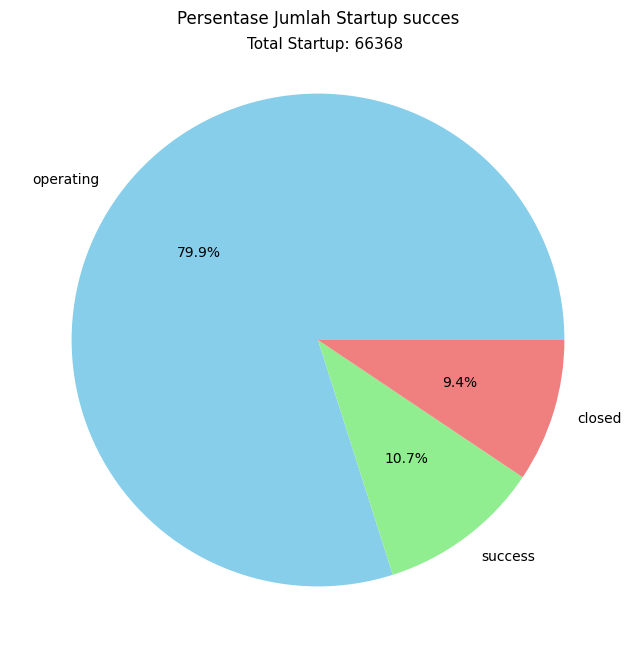

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(status_percentage_succes, labels=status_percentage_succes.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Persentase Jumlah Startup succes')
plt.text(0.03, 1.2, f"Total Startup: {len(data)}", color='black', ha='center', va='center', fontsize=11)
plt.show()

## 4. Apakah ada perbedaan signifikan dalam jumlah pendanaan terkait dengan lokasi startup?


In [ ]:
data1 = data.copy()

In [ ]:
data1.isna()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,True,True,True,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,False,False,False,False,False,False,False,False,False,False,False,True,False,False
66364,False,False,False,False,False,False,False,False,False,False,False,False,False,False
66365,False,False,False,True,False,False,True,True,True,True,False,False,False,False
66366,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
null_per_column = data1.isna().sum()
null_per_column

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd        0
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64

In [ ]:
data1.dropna(inplace=True)
data1.isna().sum()

permalink            0
name                 0
homepage_url         0
category_list        0
funding_total_usd    0
status               0
country_code         0
state_code           0
region               0
city                 0
funding_rounds       0
founded_at           0
first_funding_at     0
last_funding_at      0
dtype: int64

In [ ]:
data1_status_country = data1[['funding_total_usd','status','country_code']]
data1_status_country

,funding_total_usd,status,country_code
1,700000,operating,USA
3,2000000,operating,CHN
4,-,operating,USA
6,762851,operating,CAN
7,33600000,operating,USA
...,...,...,...
66358,15419877,closed,MYS
66361,2686600,operating,AUT
66362,1120000,operating,GBR
66364,114304,operating,HRV


In [ ]:
country_values = data1['country_code'].value_counts()
country_values

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


USA    28051
GBR     2580
CAN     1413
IND     1253
FRA      838
       ...  
QAT        1
TGO        1
CMR        1
IRN        1
PRY        1
Name: country_code, Length: 108, dtype: int64

In [ ]:
data1['country_code'].unique()

array(['USA', 'CHN', 'CAN', 'CHL', 'GBR', 'IND', 'FRA', 'AUS', 'DNK',
       'ROM', 'AUT', 'NLD', 'SWE', 'JPN', 'RUS', 'KOR', 'COL', 'ESP',
       'BEL', 'IRL', 'ITA', 'ISR', 'NZL', 'CZE', 'DEU', 'CHE', 'BRA',
       'BGR', 'JOR', 'HUN', 'BWA', 'FIN', 'TUR', 'ARE', 'CYP', 'CRI',
       'IDN', 'SVN', 'ARG', 'NGA', 'TWN', 'THA', 'SVK', 'PRT', 'NOR',
       'UKR', 'LTU', 'ISL', 'POL', 'PHL', 'MEX', 'GHA', 'PER', 'EGY',
       'PAN', 'ALB', 'UGA', 'HRV', 'EST', 'KEN', 'MUS', 'LBN', 'LUX',
       'IRN', 'MYS', 'GTM', 'BAH', 'ARM', 'BGD', 'MDA', 'TUN', 'GRC',
       'NPL', 'LVA', 'TTO', 'BHR', 'CMR', 'SRB', 'BLR', 'CYM', 'ECU',
       'SLV', 'PAK', 'MKD', 'TGO', 'TAN', 'BMU', 'HND', 'MMR', 'QAT',
       'MAR', 'SAU', 'GEO', 'DOM', 'DZA', 'JAM', 'AZE', 'LIE', 'DMA',
       'OMN', 'RWA', 'KHM', 'GRD', 'LAO', 'LKA', 'SOM', 'SYC', 'PRY'],
      dtype=object)

In [ ]:
len(data1['country_code'].unique())

108

In [ ]:
funding_outlier = data1[data1['funding_total_usd'] != '-']

In [ ]:
data1['funding_total_usd'] = data1['funding_total_usd'].replace('-', '0').astype(float)


In [ ]:
funding_by_country = data1.groupby('country_code')['funding_total_usd'].mean()
pd.options.display.float_format = '{:.2f}'.format
funding_by_country

country_code
ALB     138372.06
ARE   19701667.53
ARG    1945248.24
ARM    8939166.67
AUS    8326008.29
          ...    
TUR    3714062.74
TWN   20824839.21
UGA     401692.31
UKR     463374.25
USA   19716967.84
Name: funding_total_usd, Length: 108, dtype: float64

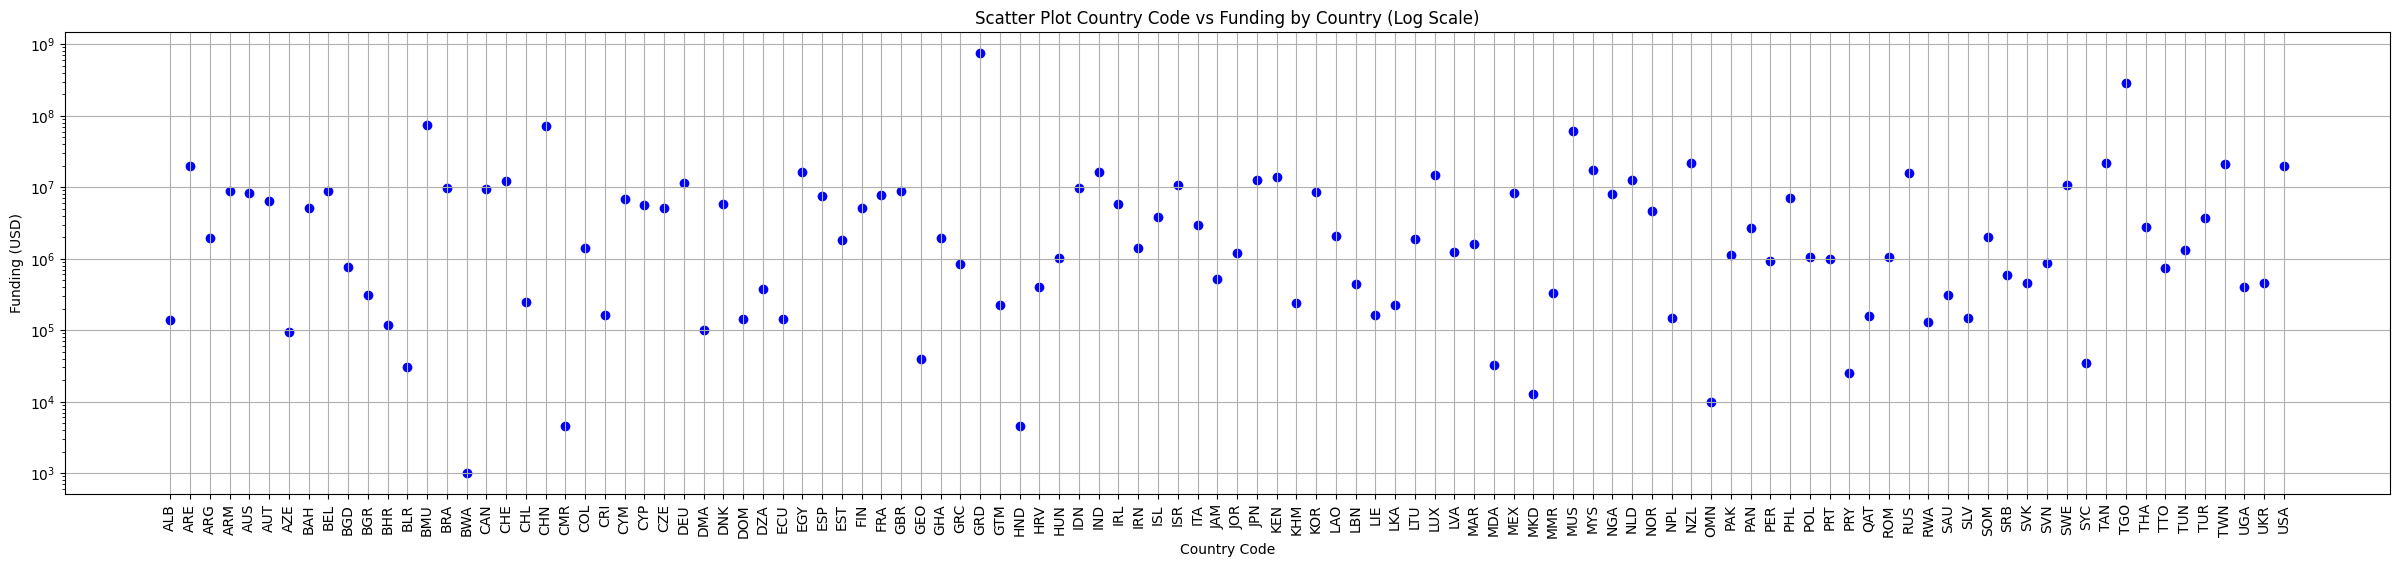

In [ ]:
plt.figure(figsize=(30, 6))
plt.scatter(funding_by_country.index, funding_by_country.values, color='blue')

# Mengatur skala sumbu y menjadi logaritmik
plt.yscale('log')

plt.title('Scatter Plot Country Code vs Funding by Country (Log Scale)')
plt.xlabel('Country Code')
plt.ylabel('Funding (USD)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

## 5. Bagaimana faktor waktu memengaruhi kesuksesan sebuah startup?


In [ ]:
data1['founded_at'] = pd.to_datetime(data1['founded_at'], errors='coerce')
data1['first_funding_at'] = pd.to_datetime(data1['first_funding_at'], errors='coerce')
data1['last_funding_at'] = pd.to_datetime(data1['last_funding_at'], errors='coerce')

print(data1)

                                 permalink                    name  \
1                   /organization/-qounter                :Qounter   
3                    /organization/0-6-com                 0-6.com   
4           /organization/004-technologies        004 Technologies   
6      /organization/0ndine-biomedical-inc  Ondine Biomedical Inc.   
7                     /organization/0xdata                  H2O.ai   
...                                    ...                     ...   
66358       /organization/zyraz-technology        Zyraz Technology   
66361             /organization/zytoprotec              Zytoprotec   
66362                  /organization/zzish                   Zzish   
66364            /organization/zzzzapp-com   Zzzzapp Wireless ltd.   
66366                /organization/Ôasys-2                   Ôasys   

                            homepage_url  \
1                 http://www.qounter.com   
3                     http://www.0-6.com   
4      http://004gmbh.de/en

In [ ]:
mask = data1['first_funding_at'] < data1['founded_at']
rows_to_drop = data1[mask]
fund_cleaned = data1.drop(rows_to_drop.index)
print(fund_cleaned)

                                 permalink                     name  \
3                    /organization/0-6-com                  0-6.com   
4           /organization/004-technologies         004 Technologies   
6      /organization/0ndine-biomedical-inc   Ondine Biomedical Inc.   
7                     /organization/0xdata                   H2O.ai   
9                /organization/1-2-3-listo              1,2,3 Listo   
...                                    ...                      ...   
66357                 /organization/zypsee  Whisk (formerly Zypsee)   
66358       /organization/zyraz-technology         Zyraz Technology   
66361             /organization/zytoprotec               Zytoprotec   
66362                  /organization/zzish                    Zzish   
66366                /organization/Ôasys-2                    Ôasys   

                            homepage_url  \
3                     http://www.0-6.com   
4      http://004gmbh.de/en/004-interact   
6              

In [ ]:
data1['days_between_fundings'] = (data1['last_funding_at'] - data1['first_funding_at']).dt.days

print(data1)

                                 permalink                    name  \
1                   /organization/-qounter                :Qounter   
3                    /organization/0-6-com                 0-6.com   
4           /organization/004-technologies        004 Technologies   
6      /organization/0ndine-biomedical-inc  Ondine Biomedical Inc.   
7                     /organization/0xdata                  H2O.ai   
...                                    ...                     ...   
66358       /organization/zyraz-technology        Zyraz Technology   
66361             /organization/zytoprotec              Zytoprotec   
66362                  /organization/zzish                   Zzish   
66364            /organization/zzzzapp-com   Zzzzapp Wireless ltd.   
66366                /organization/Ôasys-2                   Ôasys   

                            homepage_url  \
1                 http://www.qounter.com   
3                     http://www.0-6.com   
4      http://004gmbh.de/en

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
scaler = MinMaxScaler()
data1[['days_between_fundings', 'funding_total_usd']] = scaler.fit_transform(data1[['days_between_fundings', 'funding_total_usd']])

In [ ]:
data1_cleaned = data1.dropna(subset=['days_between_fundings', 'funding_total_usd'])


X = data1_cleaned[['days_between_fundings', 'funding_total_usd']]
y = data1_cleaned['status']


k = 4
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=4)

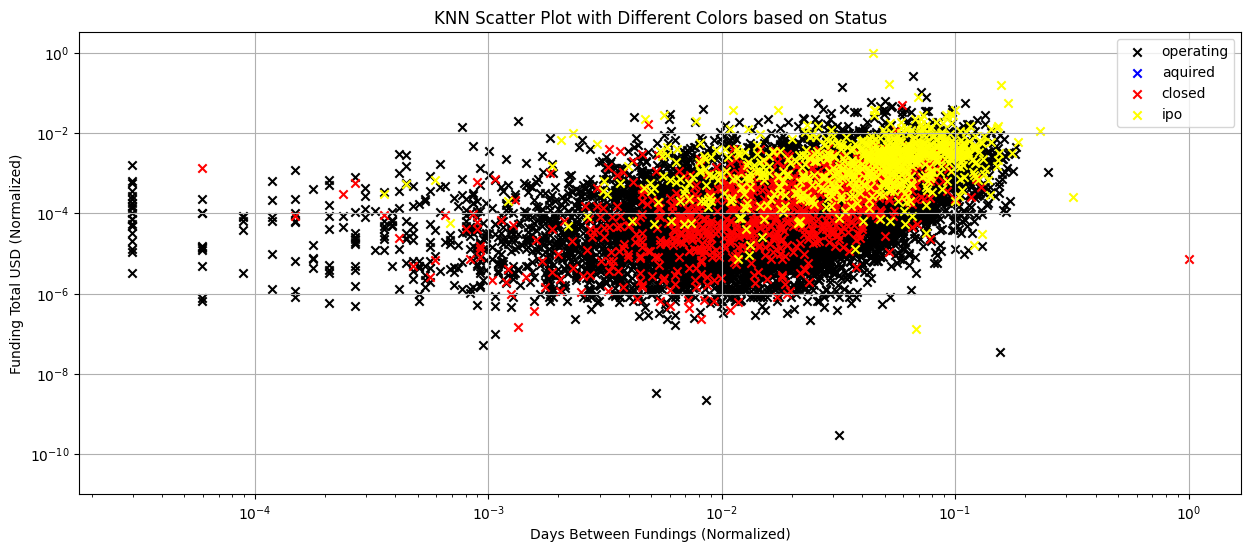

In [ ]:
plt.figure(figsize=(15, 6))
colors = {'operating': 'black', 'aquired': 'blue', 'closed': 'red', 'ipo': 'yellow'}
plt.xscale('log')
plt.yscale('log')
for status, color in colors.items():
    mask = (data1['status'] == status)
    plt.scatter(data1.loc[mask, 'days_between_fundings'], data1.loc[mask, 'funding_total_usd'], color=color, label=status, marker='x')

plt.xlabel('Days Between Fundings (Normalized)')
plt.ylabel('Funding Total USD (Normalized)')
plt.title('KNN Scatter Plot with Different Colors based on Status')
plt.legend()
plt.grid(True)
plt.show()

## 6. Apa saja kategori start up yang sukses di USA?

In [ ]:
data1['categories'] = data1['category_list'].str.split('|')
data1 = data1.explode('categories')


In [ ]:
data1['categories'].explode().unique()

array(['Application Platforms', 'Real Time', 'Social Network Media',
       'Curated Web', 'Software', 'Biotechnology', 'Analytics', 'Mobile',
       'E-Commerce', 'Networking', 'Real Estate', 'Web Hosting',
       'Health and Wellness', 'Internet Marketing', 'Media',
       'Public Relations', 'Apps', 'Cable', 'Distribution', 'Education',
       'Search', 'Art', 'Marketplaces', 'Beauty', 'Local Businesses',
       'Restaurants', 'Cosmetics', 'Games', 'Health Care',
       'Health Care Information Technology', 'Hospitals', 'Advertising',
       'Image Recognition', 'Sales and Marketing', 'Social Media',
       'Social Media Advertising', 'Mobile Commerce', 'Social Commerce',
       'Enterprise Software', 'Mobility', 'Technology', 'Social Travel',
       'Personal Health', 'Sports', 'Audio', 'Music',
       'Health Diagnostics', 'Medical Devices', 'Personalization',
       'Pharmaceuticals', 'Politics', 'SaaS', 'Local Search',
       'Web Design', 'Service Providers', 'Publishing', 'Ser

In [ ]:
data1['category_list'].isna().sum()

0

In [ ]:
data1_usa = data1[data1['country_code'] == 'USA']
data1_usa

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,days_between_fundings,categories
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,0.00,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,0.01,Application Platforms
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,0.00,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,0.01,Real Time
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,0.00,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,0.01,Social Network Media
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,0.00,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0.00,Software
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,0.00,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,0.03,Analytics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66356,/organization/zype,Zype,http://www.zype.com,Cloud Computing|Mobile Advertising|Video|Video...,0.00,operating,USA,NY,New York City,New York,2,2013-01-01,2015-04-01,2015-10-27,0.01,Video Streaming
66357,/organization/zypsee,Whisk (formerly Zypsee),http://whisk.me,Public Transportation,0.00,operating,USA,NY,New York City,New York,2,2011-01-01,2013-07-26,2013-09-25,0.00,Public Transportation
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,0.00,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01,0.00,Consumer Electronics
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,0.00,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01,0.00,Internet of Things


In [ ]:
category_counts_usa = data1_usa['category_list'].value_counts()
category_counts_usa

Software                      2025
Biotechnology                 1709
Mobile                         495
Curated Web                    490
Health Care                    479
                              ... 
Lighting                         1
Genetic Testing                  1
Flash Storage                    1
Human Computer Interaction       1
Parking                          1
Name: category_list, Length: 13144, dtype: int64

In [ ]:
top_40 = data1_usa['category_list'].value_counts().head(40).index
top_40

Index(['Software', 'Biotechnology', 'Mobile', 'Curated Web', 'Health Care',
       'Hardware + Software', 'Clean Technology', 'Enterprise Software',
       'E-Commerce', 'Health and Wellness', 'Advertising', 'Manufacturing',
       'Games', 'Education', 'Biotechnology|Health Diagnostics',
       'Semiconductors', 'Security', 'Analytics', 'Real Estate', 'Consulting',
       'EdTech|Education', 'Finance', 'Biotechnology|Health Care',
       'Web Hosting', 'Hospitality', 'Social Media', 'Finance|FinTech',
       'Entertainment|Games', 'Medical', 'Fashion', 'Sports', 'Messaging',
       'Public Relations', 'Medical Devices', 'News', 'Internet', 'Music',
       'Media|News', 'Technology', 'Automotive'],
      dtype='object')

In [ ]:
data_top_40 = data1_usa[data1_usa['category_list'].isin(top_40)]
data_top_40

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,days_between_fundings,categories
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,0.00,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0.00,Software
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,0.00,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,0.03,Analytics
8,/organization/1,One Inc.,http://whatis1.com,Mobile,0.00,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05,0.03,Mobile
12,/organization/1-800-dentist,1-800-DENTIST,http://www.1800dentist.com,Health and Wellness,0.00,operating,USA,CA,Los Angeles,Los Angeles,1,1986-01-01,2010-08-19,2010-08-19,0.00,Health and Wellness
13,/organization/1-800-doctors,1-800-DOCTORS,http://1800doctors.com,Health and Wellness,0.00,operating,USA,NJ,Newark,Iselin,1,1984-01-01,2011-03-02,2011-03-02,0.00,Health and Wellness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66340,/organization/zylun-staffing,Zylun Staffing,http://www.zylun.com,Software,0.00,operating,USA,UT,Salt Lake City,Lehi,1,2010-01-01,2014-08-28,2014-08-28,0.00,Software
66342,/organization/zymergen,Zymergen,http://www.zymergen.com,Biotechnology,0.00,operating,USA,CA,SF Bay Area,Emeryville,2,2013-01-01,2014-01-01,2015-06-16,0.02,Biotechnology
66343,/organization/zymetis,Zymetis,http://www.zymetis.com,Biotechnology,0.00,closed,USA,MD,"Washington, D.C.",College Park,3,2006-01-01,2007-01-01,2010-01-31,0.03,Biotechnology
66353,/organization/zyngenia,Zyngenia,http://www.zyngenia.com,Biotechnology,0.00,operating,USA,MD,"Washington, D.C.",Gaithersburg,1,2008-01-01,2010-09-09,2010-09-09,0.00,Biotechnology


In [ ]:
status_counts = data_top_40.groupby(['category_list', 'status']).size().unstack(fill_value=0)
status_counts

status,acquired,closed,ipo,operating
category_list,,,,
Advertising,72,41,3,228
Analytics,35,9,1,140
Automotive,4,2,4,49
Biotechnology,119,85,165,1340
Biotechnology|Health Care,8,0,132,20
Biotechnology|Health Diagnostics,22,10,26,202
Clean Technology,38,38,15,373
Consulting,13,12,3,155
Curated Web,91,91,4,304


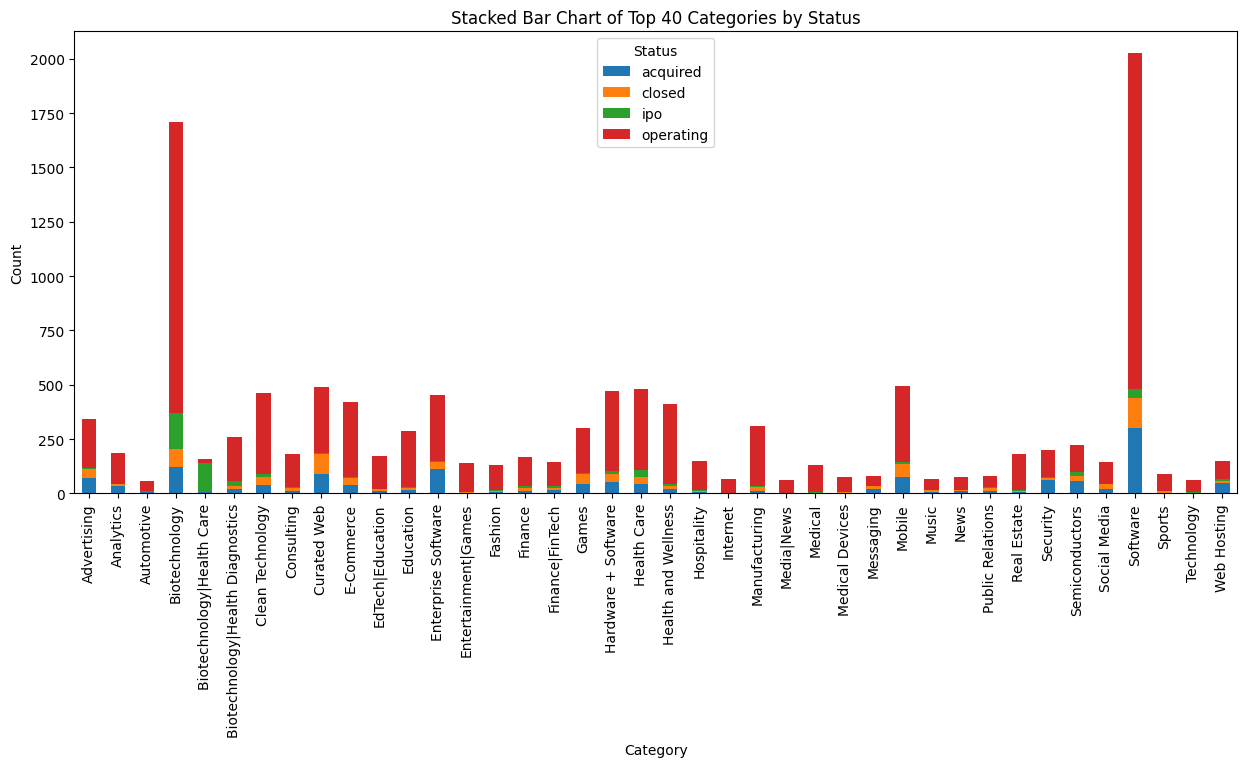

In [ ]:
status_counts.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Stacked Bar Chart of Top 40 Categories by Status')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Status')
plt.show()

# DATA PREPROCESSING

In [ ]:
data_pre = data.copy()

In [ ]:
data_pre.head(10)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09
8,/organization/1,One Inc.,http://whatis1.com,Mobile,1150050,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,40000,operating,CHL,12,Santiago,Las Condes,1,2012-01-01,2013-02-18,2013-02-18


In [ ]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


In [ ]:
data_pre.nunique()

permalink            66368
name                 66102
homepage_url         61191
category_list        27296
funding_total_usd    18896
status                   4
country_code           137
state_code             311
region                1092
city                  5111
funding_rounds          19
founded_at            3978
first_funding_at      4817
last_funding_at       4518
dtype: int64

In [ ]:
data_pre['status'] =  data_pre['status'].replace(['ipo', 'acquired'], 'success')

In [ ]:
data_pre['status'].unique()

array(['operating', 'success', 'closed'], dtype=object)

In [ ]:
data_pre = data_pre[data_pre['status'].isin(['success', 'closed'])]

In [ ]:
data_pre['founded_at'].isna().sum()

3732

In [ ]:
data_pre['founded_at'] = pd.to_datetime(data['founded_at'], errors='coerce')

<ipython-input-4196-6ba0243f44e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pre['founded_at'] = pd.to_datetime(data['founded_at'], errors='coerce')


In [ ]:
data_pre['founded_year'] = data_pre['founded_at'].dt.year

In [ ]:
data_pre['founded_year'] = data_pre['founded_year'].astype('Int64')

In [ ]:
data_pre['founded_year'].isna().sum()

3734

In [ ]:
data_pre['founded_year'].describe()

count   9600.00
mean    2004.53
std       11.08
min     1802.00
25%     2001.00
50%     2007.00
75%     2010.00
max     2041.00
Name: founded_year, dtype: Float64

In [ ]:
Q1 = data_pre['founded_year'].quantile(0.25)
Q3 = data_pre['founded_year'].quantile(0.75)
IQR = Q3 - Q1

# Menghilangkan outlier berdasarkan IQR
data_pre = data_pre[(data_pre['founded_year'] >= Q1 - 1.5 * IQR) & (data_pre['founded_year'] <= Q3 + 1.5 * IQR)]

In [ ]:
data_pre['founded_year'].describe()

count   9190.00
mean    2006.09
std        5.79
min     1988.00
25%     2002.00
50%     2007.00
75%     2011.00
max     2016.00
Name: founded_year, dtype: Float64

In [ ]:
data_pre['founded_year'].isna().sum()

0

In [ ]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9190 entries, 15 to 66358
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   permalink          9190 non-null   object        
 1   name               9189 non-null   object        
 2   homepage_url       8727 non-null   object        
 3   category_list      8810 non-null   object        
 4   funding_total_usd  9190 non-null   object        
 5   status             9190 non-null   object        
 6   country_code       8248 non-null   object        
 7   state_code         8119 non-null   object        
 8   region             8175 non-null   object        
 9   city               8175 non-null   object        
 10  funding_rounds     9190 non-null   int64         
 11  founded_at         9190 non-null   datetime64[ns]
 12  first_funding_at   9188 non-null   object        
 13  last_funding_at    9190 non-null   object        
 14  founde

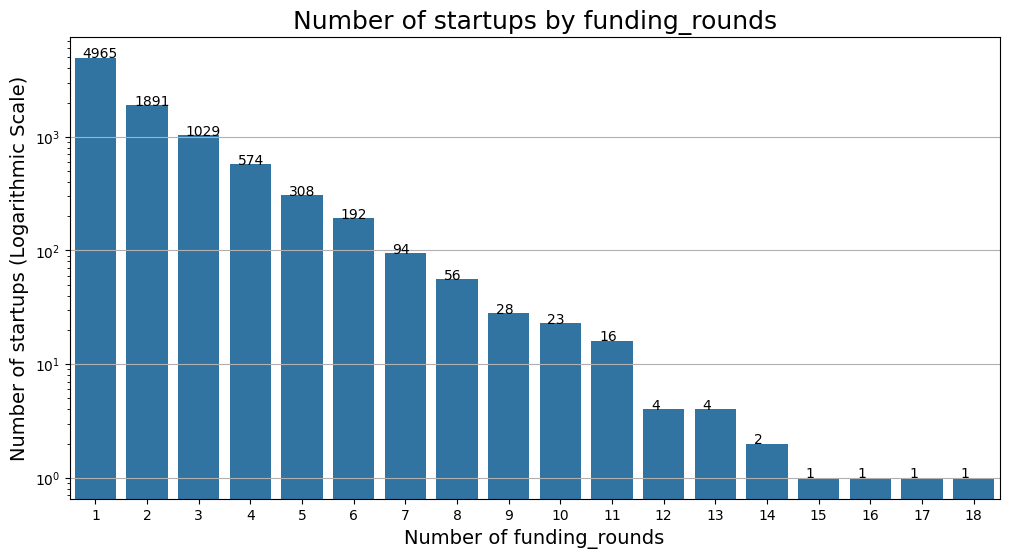

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=data_pre['funding_rounds'].value_counts().index, y=data_pre['funding_rounds'].value_counts())
plt.title('Number of startups by funding_rounds',size=18)
plt.ylabel('Number of startups (Logarithmic Scale)',size=14)
plt.xlabel('Number of funding_rounds', size=14)
plt.grid(axis='y')
plt.yscale('log')

def addlabels(x,y):
    for i in x:
        plt.text(i-1.25,y[i],y[i])

addlabels(data_pre['funding_rounds'].value_counts().index,data_pre['funding_rounds'].value_counts())

In [ ]:
data_pre['first_funding_at'].isna().sum()

2

In [ ]:
data_pre['last_funding_at'].isna().sum()

0

In [ ]:
data_pre.dropna(subset=['first_funding_at'],inplace=True)

In [ ]:
data_pre['founded_at'].isna().sum()

0

In [ ]:
data_pre['first_funding_at'] = pd.to_datetime(data_pre['first_funding_at'])
data_pre['last_funding_at'] = pd.to_datetime(data_pre['last_funding_at'])

# Hitung selisih waktu
data_pre['funding_duration'] = data_pre['last_funding_at'] - data_pre['first_funding_at']

In [ ]:
data_pre.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_year,funding_duration
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,5000000,success,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17,2012,0 days
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,500000,success,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15,2009,0 days
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,2535000,success,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16,2010,411 days
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,1250000,success,USA,CA,SF Bay Area,San Francisco,2,2011-09-16,2011-11-02,2011-11-30,2011,28 days
32,/organization/1010data,1010data,http://www.1010data.com,Software,35000000,success,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08,2000,0 days


ubah total fund ke numerik

In [ ]:
data_pre['funding_total_usd'] = pd.to_numeric(data_pre['funding_total_usd'].str.replace(',', ''), errors='coerce')


In [ ]:
data_pre[data_pre['funding_total_usd'].isnull()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_year,funding_duration
58,/organization/123people,yelster digital gmbh (former 123people),http://yelsterdigital.com,Local Search|Software|Web Design,NaN,success,AUT,9,Vienna,Vienna,1,2007-01-01,2008-01-01,2008-01-01,2007,0 days
64,/organization/12society,12Society,http://www.12Society.com,E-Commerce,NaN,success,USA,CA,Los Angeles,West Hollywood,1,2012-01-01,2012-04-05,2012-04-05,2012,0 days
88,/organization/1bib,1bib,http://www.1bib.com,Cars|Curated Web,NaN,closed,CHN,30,Guangzhou,Guangzhou,1,2006-01-01,2008-02-07,2008-02-07,2006,0 days
92,/organization/1cast,1Cast,http://www.1cast.com,Content|Lifestyle|News|Video,NaN,closed,USA,WA,Seattle,Kirkland,1,2006-06-01,2008-08-12,2008-08-12,2006,0 days
93,/organization/1click,1CLICK,http://1click.io,Chat|Mobile,NaN,success,IND,19,Bangalore,Bangalore,1,2012-11-01,2014-01-26,2014-01-26,2012,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66189,/organization/zoombu,Zoombu,http://www.zoombu.co.uk,Search|Startups|Travel,NaN,success,GBR,H9,London,London,2,2008-07-01,2008-12-01,2009-06-02,2008,183 days
66216,/organization/zooplus,Zooplus,http://www.zooplus.de,Pets|Trading,NaN,success,DEU,2,Muenchen,Muenchen,1,1999-01-01,2000-01-01,2000-01-01,1999,0 days
66262,/organization/zubican,Zubican,http://www.zubican.com,B2B|Curated Web|Internet Marketing|Procurement,NaN,success,USA,CA,Santa Barbara,Moorpark,1,2006-12-01,2008-05-01,2008-05-01,2006,0 days
66316,/organization/zuuka,zuuka!,http://www.istorytime.com,Apps|Entertainment|Kids|Mobile|Publishing,NaN,success,USA,CA,Santa Barbara,Santa Barbara,2,2009-04-10,2011-01-24,2012-06-11,2009,504 days


In [ ]:
data_pre['funding_total_usd'].isnull().sum()

1312

In [ ]:
data_pre['funding_total_usd'].describe()

count         7876.00
mean      30922889.65
std      163950125.34
min              6.00
25%         750000.00
50%        5100000.00
75%       22071212.25
max     5820000000.00
Name: funding_total_usd, dtype: float64

In [ ]:
# data_pre.dropna(subset=['funding_total_usd'], inplace=True)

In [ ]:
# data_pre['funding_total_usd'].fillna(data_pre['funding_total_usd'].median(), inplace=True)

In [ ]:
Q1 = data_pre['funding_total_usd'].quantile(0.25)
Q3 = data_pre['funding_total_usd'].quantile(0.75)
IQR = Q3 - Q1

# Menghilangkan outlier berdasarkan IQR
data_pre = data_pre[(data_pre['funding_total_usd'] >= Q1 - 1.5 * IQR) & (data_pre['funding_total_usd'] <= Q3 + 1.5 * IQR)]

In [ ]:
data_pre.describe()

,funding_total_usd,funding_rounds,founded_year,funding_duration
count,6954.00,6954.00,6954.00,6954
mean,9303695.01,1.92,2006.27,466 days 16:51:33.701466784
std,12368525.04,1.36,5.60,840 days 07:47:06.003539936
min,6.00,1.00,1988.00,0 days 00:00:00
25%,525000.00,1.00,2003.00,0 days 00:00:00
50%,3500000.00,1.00,2007.00,0 days 00:00:00
75%,13298081.75,2.00,2011.00,713 days 18:00:00
max,54000000.00,18.00,2015.00,33628 days 00:00:00


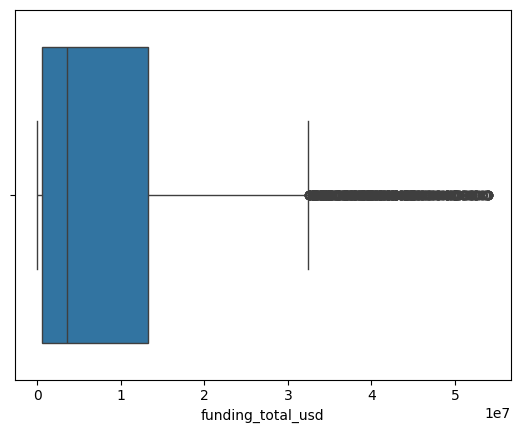

In [ ]:
sns.boxplot(x=data_pre['funding_total_usd'])
plt.show()

In [ ]:
data_pre.describe()

,funding_total_usd,funding_rounds,founded_year,funding_duration
count,6954.00,6954.00,6954.00,6954
mean,9303695.01,1.92,2006.27,466 days 16:51:33.701466784
std,12368525.04,1.36,5.60,840 days 07:47:06.003539936
min,6.00,1.00,1988.00,0 days 00:00:00
25%,525000.00,1.00,2003.00,0 days 00:00:00
50%,3500000.00,1.00,2007.00,0 days 00:00:00
75%,13298081.75,2.00,2011.00,713 days 18:00:00
max,54000000.00,18.00,2015.00,33628 days 00:00:00


In [ ]:
data_pre['funding_total_usd'].fillna(data_pre['funding_total_usd'].mean(), inplace=True)

In [ ]:
# from scipy import stats

# # Hitung Z-Score
# z_scores = stats.zscore(data_pre['funding_total_usd'])

# # Tentukan batas Z-Score untuk outlier
# threshold =2

# # Hapus outlier berdasarkan Z-Score
# data_pre = data_pre[(z_scores < threshold) & (z_scores > -threshold)]

In [ ]:
data_pre.describe()

,funding_total_usd,funding_rounds,founded_year,funding_duration
count,6954.00,6954.00,6954.00,6954
mean,9303695.01,1.92,2006.27,466 days 16:51:33.701466784
std,12368525.04,1.36,5.60,840 days 07:47:06.003539936
min,6.00,1.00,1988.00,0 days 00:00:00
25%,525000.00,1.00,2003.00,0 days 00:00:00
50%,3500000.00,1.00,2007.00,0 days 00:00:00
75%,13298081.75,2.00,2011.00,713 days 18:00:00
max,54000000.00,18.00,2015.00,33628 days 00:00:00


In [ ]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 15 to 66358
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   permalink          6954 non-null   object         
 1   name               6953 non-null   object         
 2   homepage_url       6602 non-null   object         
 3   category_list      6844 non-null   object         
 4   funding_total_usd  6954 non-null   float64        
 5   status             6954 non-null   object         
 6   country_code       6319 non-null   object         
 7   state_code         6225 non-null   object         
 8   region             6270 non-null   object         
 9   city               6270 non-null   object         
 10  funding_rounds     6954 non-null   int64          
 11  founded_at         6954 non-null   datetime64[ns] 
 12  first_funding_at   6954 non-null   datetime64[ns] 
 13  last_funding_at    6954 non-null   datetime64[

In [ ]:
data_pre['funding_rounds'].isnull().sum()

0

In [ ]:
data_pre['funding_rounds'].describe()

count   6954.00
mean       1.92
std        1.36
min        1.00
25%        1.00
50%        1.00
75%        2.00
max       18.00
Name: funding_rounds, dtype: float64

In [ ]:
## Hitung nilai IQR
# Q1 = data_pre['funding_rounds'].quantile(0.25)
# Q3 = data_pre['funding_rounds'].quantile(0.75)
# IQR = Q3 - Q1

# # Tentukan batas bawah dan batas atas untuk mengidentifikasi outlier
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Hapus outlier berdasarkan batas bawah dan batas atas
# data_pre = data_pre[(data_pre['funding_rounds'] >= lower_bound) & (data_pre['funding_rounds'] <= upper_bound)]

# # Tampilkan data setelah menghapus outlier

# data_pre.describe()

In [ ]:
data_pre['country_code'].nunique()

73

In [ ]:
data_pre['country_code'].isna().sum()

635

In [ ]:
data_pre.dropna(subset=['country_code'], inplace=True)

In [ ]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6319 entries, 15 to 66358
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   permalink          6319 non-null   object         
 1   name               6318 non-null   object         
 2   homepage_url       6031 non-null   object         
 3   category_list      6274 non-null   object         
 4   funding_total_usd  6319 non-null   float64        
 5   status             6319 non-null   object         
 6   country_code       6319 non-null   object         
 7   state_code         6225 non-null   object         
 8   region             6270 non-null   object         
 9   city               6270 non-null   object         
 10  funding_rounds     6319 non-null   int64          
 11  founded_at         6319 non-null   datetime64[ns] 
 12  first_funding_at   6319 non-null   datetime64[ns] 
 13  last_funding_at    6319 non-null   datetime64[

In [ ]:
data_pre['country_code'].isna().sum()

0

In [ ]:
data_pre.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_year,funding_duration
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,5000000.00,success,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17,2012,0 days
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,500000.00,success,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15,2009,0 days
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,2535000.00,success,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16,2010,411 days
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,1250000.00,success,USA,CA,SF Bay Area,San Francisco,2,2011-09-16,2011-11-02,2011-11-30,2011,28 days
32,/organization/1010data,1010data,http://www.1010data.com,Software,35000000.00,success,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08,2000,0 days


In [ ]:
data_pre['funding_duration'].describe()

count                           6319
mean     505 days 13:14:37.923722104
std      868 days 16:29:17.806728080
min                  0 days 00:00:00
25%                  0 days 00:00:00
50%                  3 days 00:00:00
75%                783 days 00:00:00
max              33628 days 00:00:00
Name: funding_duration, dtype: object

In [ ]:
data_pre['funding_duration'] = data_pre['funding_duration'].dt.days

In [ ]:
data_pre['funding_duration'].describe()

count    6319.00
mean      505.55
std       868.69
min         0.00
25%         0.00
50%         3.00
75%       783.00
max     33628.00
Name: funding_duration, dtype: float64

metode label encoding pada kolom country_code

In [ ]:
data_pre['country_code']

15       USA
20       USA
23       USA
31       USA
32       USA
        ... 
66338    USA
66343    USA
66349    ESP
66350    USA
66358    MYS
Name: country_code, Length: 6319, dtype: object

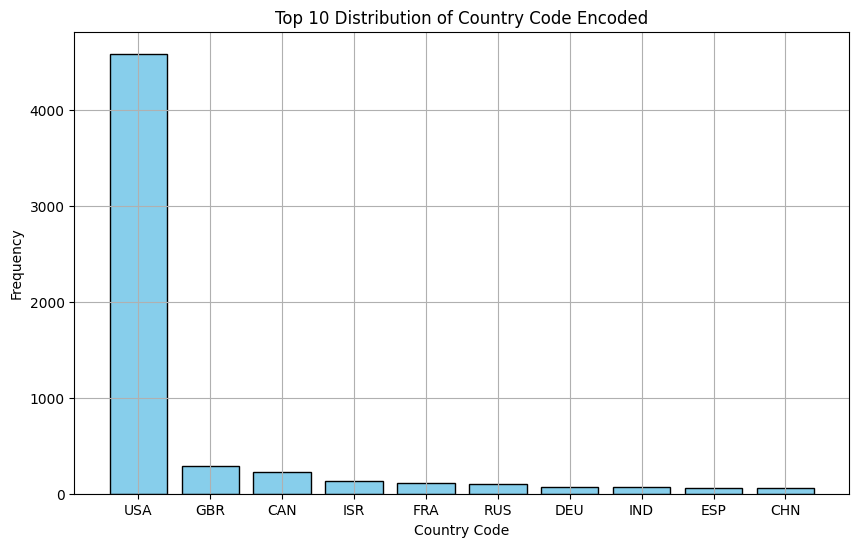

In [ ]:
top_10_countries = data_pre['country_code'].value_counts().head(10)

# Membuat histogram dari fitur 'country_code_encoded'
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries.index, top_10_countries.values, color='skyblue', edgecolor='black')
plt.xlabel('Country Code')
plt.ylabel('Frequency')
plt.title('Top 10 Distribution of Country Code Encoded')
plt.grid(True)
plt.show()

In [ ]:
# data_pre['country_code_encoded'].nunique()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Menggunakan LabelEncoder pada kolom 'country_code'
data_pre['country_code_encoded'] = label_encoder.fit_transform(data_pre['country_code'])


In [ ]:
data_pre['country_code_encoded'] = data_pre['country_code'].apply(lambda x: 1 if x == 'USA' else 0)

# Proses label encoding untuk negara-negara lainnya
other_countries = data_pre['country_code'][data_pre['country_code'] != 'USA'].unique()
for country in other_countries:
    data_pre['country_code_encoded'] = data_pre['country_code_encoded'].replace({country: 2})

In [ ]:
data_pre['country_code_encoded'].unique()

array([1, 0])

In [ ]:
data_pre['status'] = label_encoder.fit_transform(data_pre['status'])

In [ ]:
data_pre.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_year,funding_duration,country_code_encoded
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,5000000.00,1,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17,2012,0,1
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,500000.00,1,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15,2009,0,1
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,2535000.00,1,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16,2010,411,1
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,1250000.00,1,USA,CA,SF Bay Area,San Francisco,2,2011-09-16,2011-11-02,2011-11-30,2011,28,1
32,/organization/1010data,1010data,http://www.1010data.com,Software,35000000.00,1,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08,2000,0,1


sortir feature yang diperlukan

In [ ]:
data_mod = data_pre[['funding_total_usd','funding_rounds','country_code_encoded','status','funding_duration','founded_year']]
data_mod.head()

,funding_total_usd,funding_rounds,country_code_encoded,status,funding_duration,founded_year
15,5000000.00,1,1,1,0,2012
20,500000.00,1,1,1,0,2009
23,2535000.00,2,1,1,411,2010
31,1250000.00,2,1,1,28,2011
32,35000000.00,1,1,1,0,2000


cek heatmap

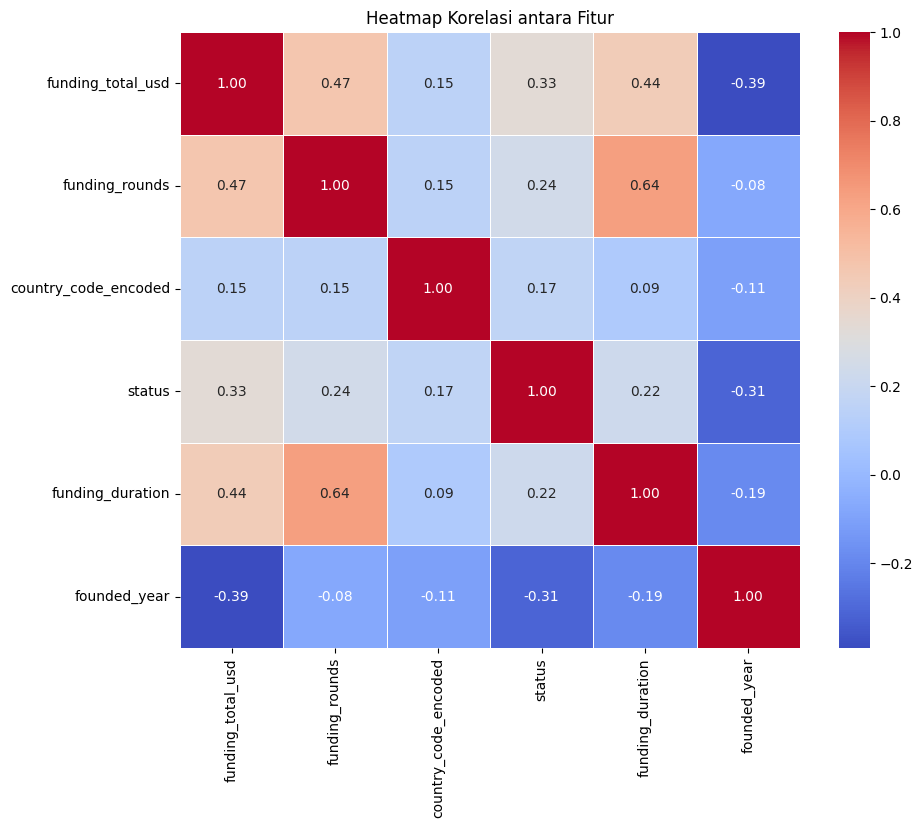

In [ ]:
correlation_matrix = data_mod.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi antara Fitur')
plt.show()

In [ ]:
data_mod.describe()

,funding_total_usd,funding_rounds,country_code_encoded,status,funding_duration,founded_year
count,6319.00,6319.00,6319.00,6319.00,6319.00,6319.00
mean,9944445.82,1.99,0.73,0.59,505.55,2005.85
std,12608167.24,1.39,0.45,0.49,868.69,5.47
min,100.00,1.00,0.00,0.00,0.00,1988.00
25%,775000.00,1.00,0.00,0.00,0.00,2002.00
50%,4258500.00,2.00,1.00,1.00,3.00,2007.00
75%,14628490.00,3.00,1.00,1.00,783.00,2010.00
max,54000000.00,18.00,1.00,1.00,33628.00,2015.00


pisahkan feature target

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data_mod[['funding_total_usd','funding_rounds' ,'country_code_encoded','funding_duration','founded_year']]
y = data_mod['status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
class_score = pd.DataFrame(columns=["Model", "Accuracy"])

pd.options.display.float_format = '{:.2f}'.format

# Karena nilai akurasi yang mendekati 1 itu semakin baik, maka kita beri parameter ascending=False
class_score.sort_values(by="Accuracy", ascending=True)

,Model,Accuracy


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f'Accuracy: {accuracy:.2f}\n')
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

class_score.loc[len(class_score)] = ["DTC", accuracy]

class_score



Accuracy: 0.65

Confusion Matrix:
[[308 179]
 [258 519]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.63      0.58       487
           1       0.74      0.67      0.70       777

    accuracy                           0.65      1264
   macro avg       0.64      0.65      0.64      1264
weighted avg       0.67      0.65      0.66      1264



,Model,Accuracy
0,DTC,0.65


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_rf = model_rf.predict(X_test)

# Evaluasi performa model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Tampilkan hasil evaluasi
print(f'Random Forest Classifier:\nAccuracy: {accuracy_rf:.2f}\n')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('\nClassification Report:')
print(class_report_rf)

class_score.loc[len(class_score)] = ["Random Forest", accuracy_rf]

class_score

Random Forest Classifier:
Accuracy: 0.72

Confusion Matrix:
[[290 197]
 [160 617]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.60      0.62       487
           1       0.76      0.79      0.78       777

    accuracy                           0.72      1264
   macro avg       0.70      0.69      0.70      1264
weighted avg       0.71      0.72      0.72      1264



,Model,Accuracy
0,DTC,0.65
1,Random Forest,0.72


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_gb = model_gb.predict(X_test)

# Evaluasi performa model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

# Tampilkan hasil evaluasi
print(f'Gradient Boosting Classifier:\nAccuracy: {accuracy_gb:.2f}\n')
print('Confusion Matrix:')
print(conf_matrix_gb)
print('\nClassification Report:')
print(class_report_gb)

class_score.loc[len(class_score)] = ["Gradient Boosting", accuracy_gb]

class_score

Gradient Boosting Classifier:
Accuracy: 0.76

Confusion Matrix:
[[281 206]
 [100 677]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.58      0.65       487
           1       0.77      0.87      0.82       777

    accuracy                           0.76      1264
   macro avg       0.75      0.72      0.73      1264
weighted avg       0.76      0.76      0.75      1264



,Model,Accuracy
0,DTC,0.65
1,Random Forest,0.72
2,Gradient Boosting,0.76


In [ ]:
from sklearn.neighbors import KNeighborsClassifier



# Inisialisasi dan latih model KNN
k = 10
model_knn = KNeighborsClassifier(n_neighbors=k)
model_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred_knn = model_knn.predict(X_test_scaled)

# Evaluasi performa model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

# Tampilkan hasil evaluasi
print(f'K-Nearest Neighbors (KNN):\nAccuracy: {accuracy_knn:.2f}\n')
print('Confusion Matrix:')
print(conf_matrix_knn)
print('\nClassification Report:')
print(class_report_knn)

class_score.loc[len(class_score)] = ["KNN", accuracy_knn]

class_score

K-Nearest Neighbors (KNN):
Accuracy: 0.72

Confusion Matrix:
[[321 166]
 [186 591]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.66      0.65       487
           1       0.78      0.76      0.77       777

    accuracy                           0.72      1264
   macro avg       0.71      0.71      0.71      1264
weighted avg       0.72      0.72      0.72      1264



,Model,Accuracy
0,DTC,0.65
1,Random Forest,0.72
2,Gradient Boosting,0.76
3,KNN,0.72


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_lda = model_lda.predict(X_test)

# Evaluasi performa model
accuracy_lda = accuracy_score(y_test, y_pred_lda)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
class_report_lda = classification_report(y_test, y_pred_lda)

# Tampilkan hasil evaluasi
print(f'Linear Discriminant Analysis (LDA):\nAccuracy: {accuracy_lda:.2f}\n')
print('Confusion Matrix:')
print(conf_matrix_lda)
print('\nClassification Report:')
print(class_report_lda)

class_score.loc[len(class_score)] = ["LDA", accuracy_lda]

class_score.sort_values(by="Accuracy", ascending=False)

Linear Discriminant Analysis (LDA):
Accuracy: 0.73

Confusion Matrix:
[[323 164]
 [178 599]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       487
           1       0.79      0.77      0.78       777

    accuracy                           0.73      1264
   macro avg       0.71      0.72      0.72      1264
weighted avg       0.73      0.73      0.73      1264



,Model,Accuracy
2,Gradient Boosting,0.76
4,LDA,0.73
3,KNN,0.72
1,Random Forest,0.72
0,DTC,0.65


In [ ]:
class_score.drop(class_score.index)

,Model,Accuracy
